In [1]:
from ete3 import Tree, TreeStyle, Tree, TextFace, CircleFace, NodeStyle, add_face_to_node
%load_ext autoreload
%autoreload 2

## Grow Phase

In [2]:
def grow(root, alphabet, verbose = 0):
    leafs = root.get_leaves()
    for leaf in leafs:
        if verbose > 2:
                print(leaf.name)
        if leaf.name in alphabet.keys():            
            leaf.add_child(alphabet[leaf.name].copy("newick"))
            if verbose > 1:
                print(t)

            # delete extra ''            
            child = leaf.get_children()[0]
            if child.name == '':
                child.delete()
    return root
        

## Transition Phase

In [54]:
def transition(root, transitions):
    for node in root.traverse("preorder"):
#         if node.name == '': 
#             print('deleting:'+node.name)
#             node.delete(prevent_nondicotomic=True)
        
            transitioned = False
            try:
                prev = node.get_ancestors()
                prev = prev[0]       
                node.name = transitions['-'.join([prev.name, node.name])] 
                transitioned = True
            except:pass       
            if not transitioned:
                try:node.name = transitions[node.name]
                except:pass
    return root


### Other Functions 

In [55]:
def countLayers(root):
    "counts how many nodes per layer"
    counts = {}
    for node in root.traverse("preorder"):
        depth = node.get_distance(root)
        if depth in counts.keys():
            counts[depth] += 1
        else:
            counts[depth] = 1
    return counts

def countNodes(root):
    "counts how many nodes per layer"
    counts = {}
    for node in root.traverse("preorder"):
        name = node.name
        if name in counts.keys():
            counts[name] += 1
        else:
            counts[name] = 1
    return counts

def countNodesPerLayer(root, name):
    "counts how many nodes per layer with a given name"
    counts = {}
    for node in root.traverse("preorder"):
        if node.name == name:
            depth = node.get_distance(root)
            if depth in counts.keys():
                counts[depth] += 1
            else:
                counts[depth] = 1
    return counts

def find_first_name(root, name):
    "Finds nodes with a given number of leaves"
    for n in root.traverse():
        if n.name == name:
            return n
    return None

def list2tree(node_list):  
    t = Tree()
    prev = t.add_child(name=node_list[0])
    for node_name in node_list[1:]:
        prev = prev.add_child(name=node_name)
    return t

def horzTree(name, num):
    t = Tree()
    for i in range(num):
        t.add_child(name = name)
    return t
    

In [56]:
a = list2tree(['1','2','3','4'])
print(a)


-- /- /- /- /-4


In [57]:
a = horzTree('1',6)
print(a)


   /-1
  |
  |--1
  |
  |--1
--|
  |--1
  |
  |--1
  |
   \-1


## Fibonacci

In [58]:
# Fibonacci
alphabet = {}
#t.unroot()
alphabet['A'] = Tree('(A,(A));')
print alphabet['A']



   /-A
--|
   \- /-A


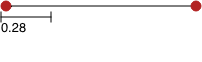

In [59]:
root = Tree('(A);')


def my_layout(node):
    
    nstyle = NodeStyle()
    nstyle["size"] = 10
    nstyle["fgcolor"] = "FireBrick"
    node.set_style(nstyle)

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout    

root.render("%%inline",tree_style = ts) 

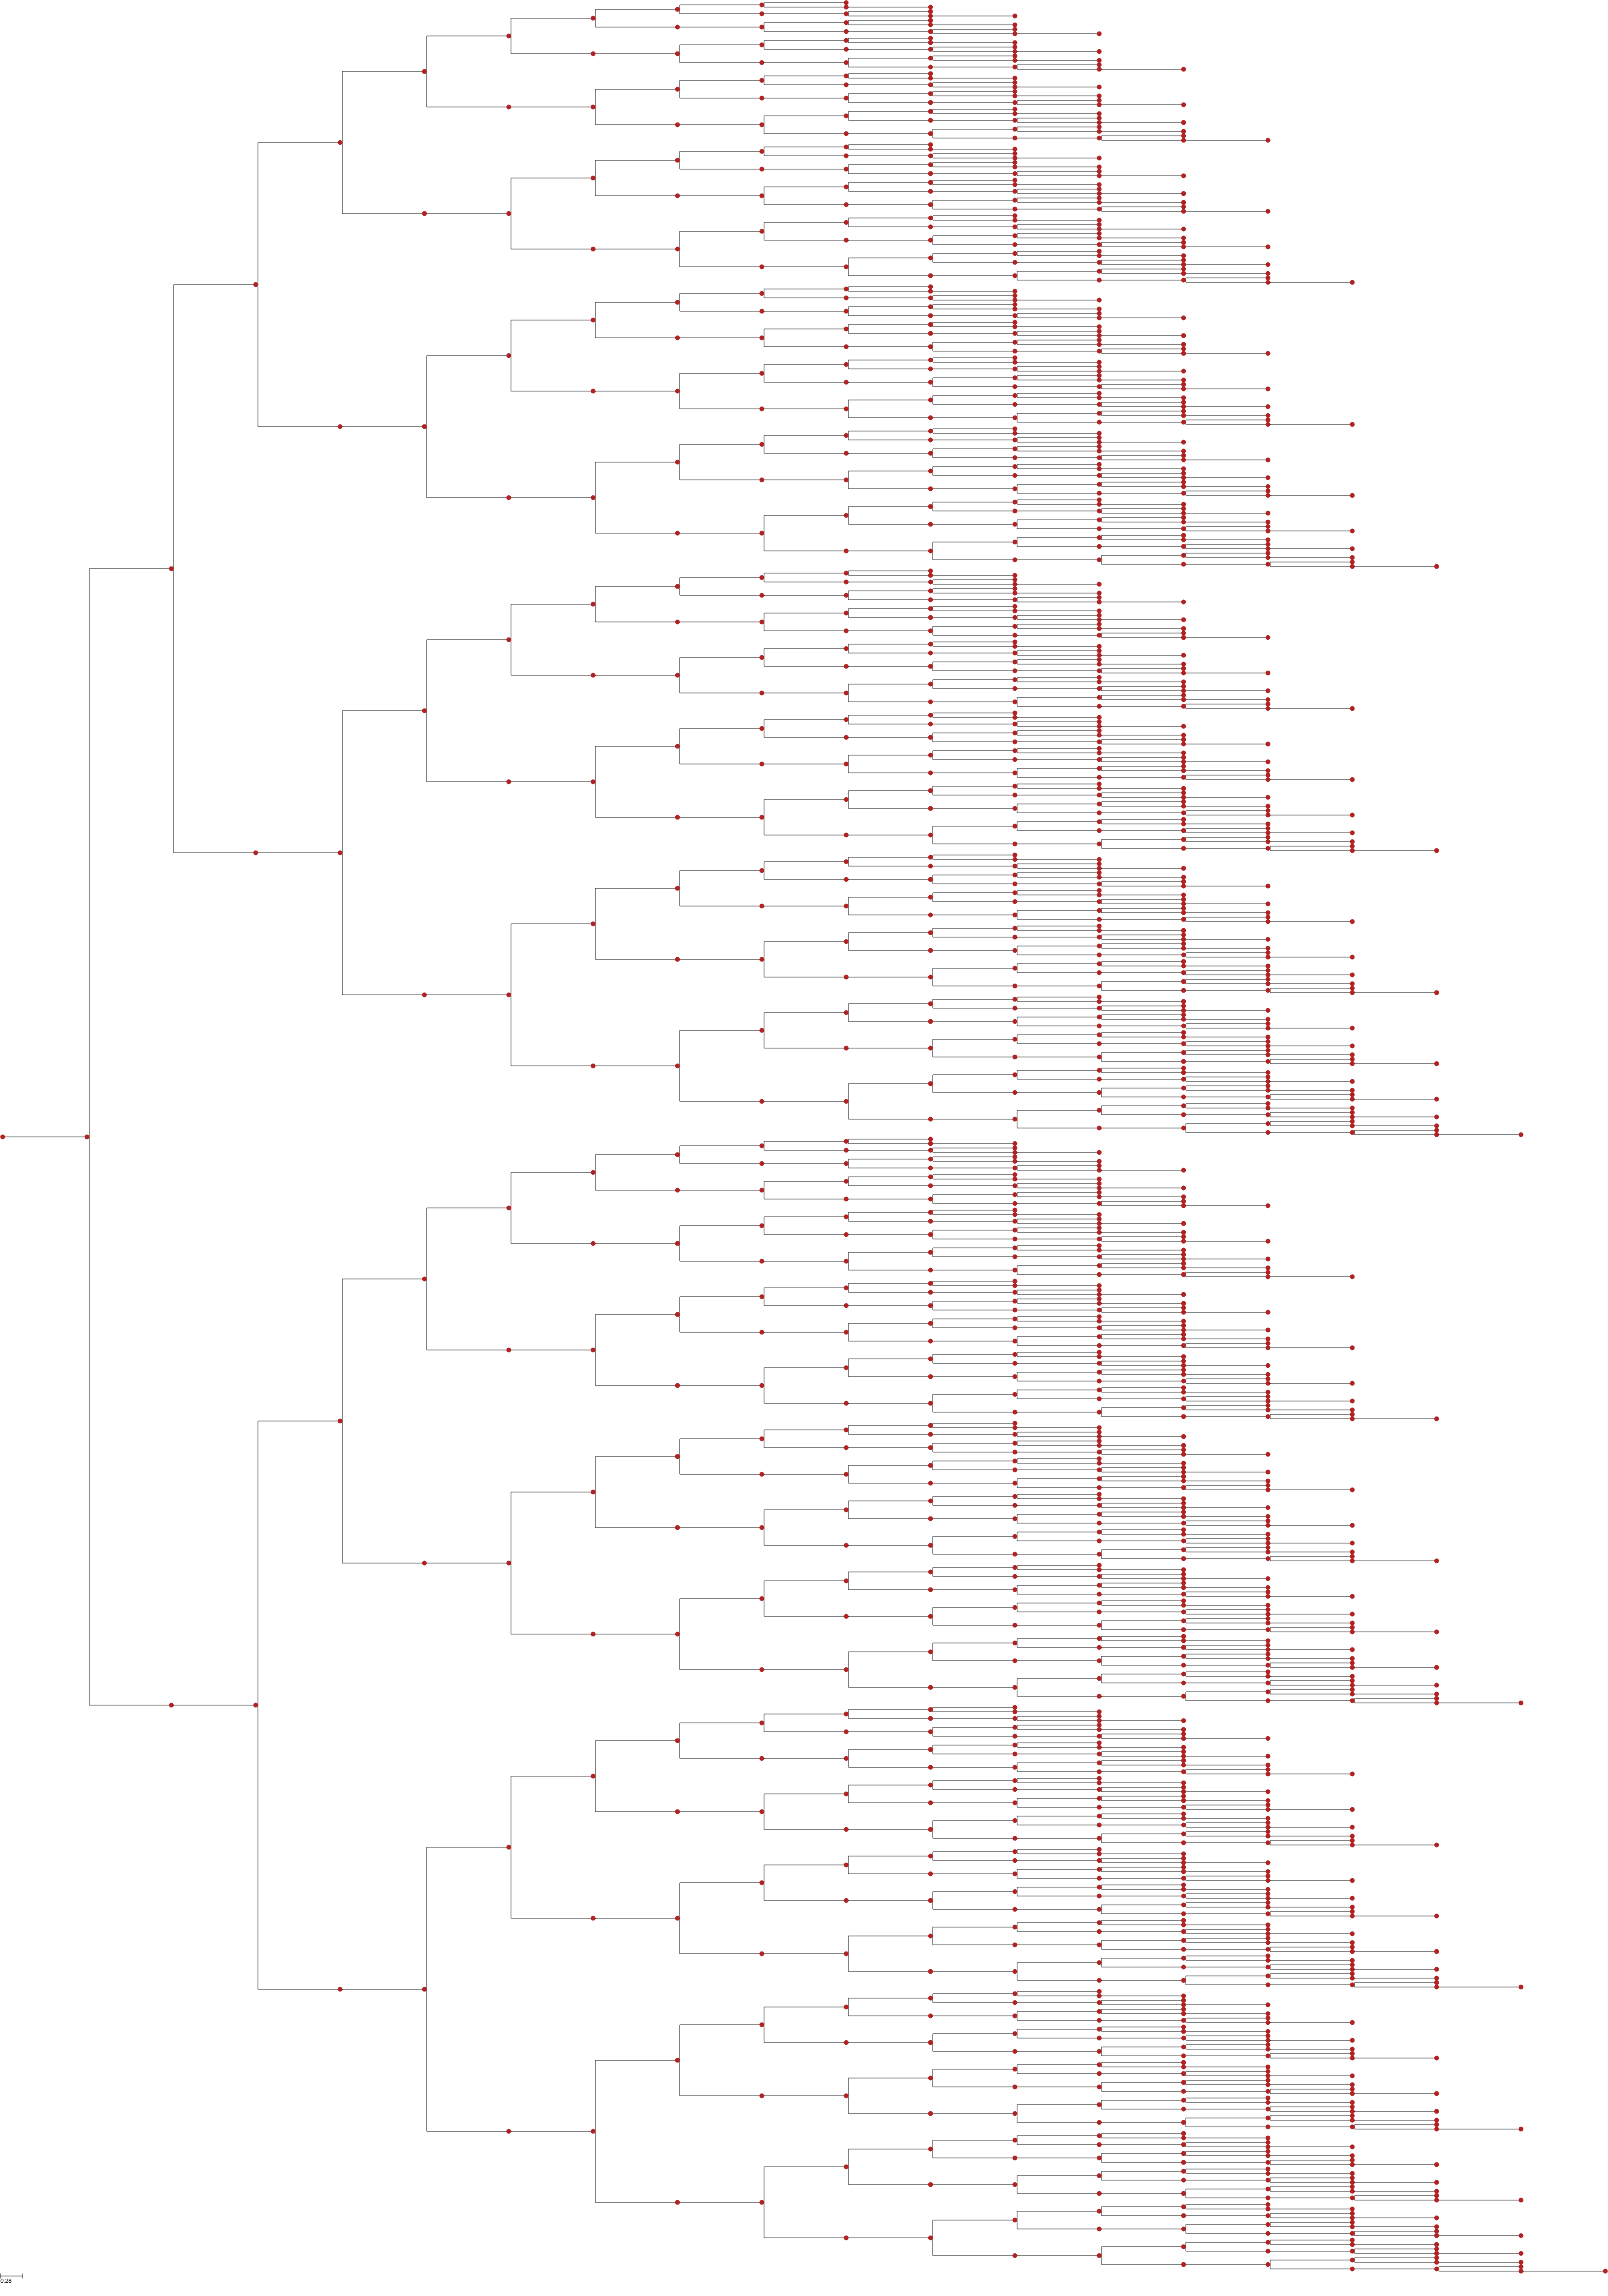

In [68]:
grow(root,alphabet)
transition(root,transitions)
root.render("%%inline",tree_style = ts) 

In [70]:
countLayers(root)

{0.0: 1,
 1.0: 1,
 2.0: 2,
 3.0: 3,
 4.0: 5,
 5.0: 8,
 6.0: 13,
 7.0: 21,
 8.0: 34,
 9.0: 55,
 10.0: 89,
 11.0: 142,
 12.0: 212,
 13.0: 273,
 14.0: 281,
 15.0: 218,
 16.0: 121,
 17.0: 45,
 18.0: 10,
 19.0: 1}

## Multiply

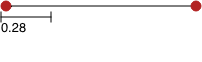

In [71]:
# Calculate A * B
A = 5
B = 3

alphabet = {}
alphabet['1st'] = horzTree('1',A)
alphabet['2nd'] = horzTree('1',B)

#Transitions
transitions = {}
transitions['1st-1'] = '2nd'

root = Tree('(1st);')

root.render("%%inline",tree_style = ts) 

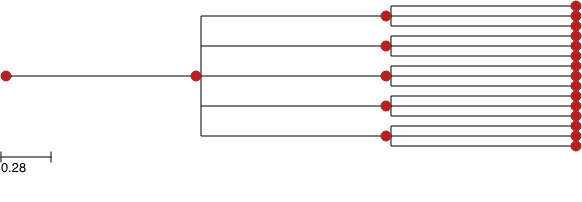

In [74]:
grow(root,alphabet)
transition(root,transitions)
root.render("%%inline",tree_style = ts) 

In [75]:
L = countLayers(root)
print('%d * %d = %d' %(A,B,L[3]))

5 * 3 = 15


# Subtract

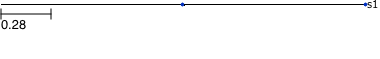

In [76]:
# Calculate A - B
A = 5
B = 2

alphabet = {}

t1 = Tree()
prev = t1.add_child(name="s1")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e1")


alphabet['s1'] = t1

t2 = Tree()
prev = t2.add_child(name="s2")
for i in range(A):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="e2")

alphabet['e1'] = t2

#Transitions
transitions = {}
transitions['s1'] = 's*'
transitions['s*'] = 's2'
transitions['s2-1'] = '2'
transitions['2'] = '3'
transitions['3-1'] = '2'

transitions['3-s2'] = 'D'
transitions['D-3'] = 'D'
transitions['D-2'] = 'D'


root = Tree()
root.format = 100
a = root.add_child(name="s1")


def my_layout(node):
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout
root.render("%%inline",tree_style = ts) 

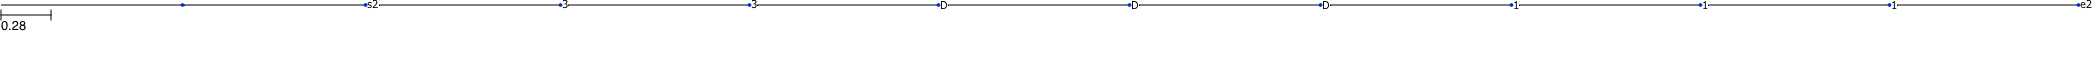

In [83]:
#Run
root = grow(root,alphabet)
transition(root,transitions)
root.render("%%inline",tree_style = ts) 

5 - 2 = 3


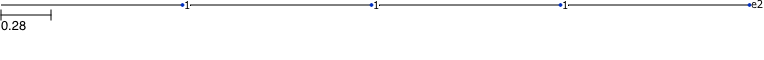

In [86]:
# Display ans
ans = find_first_name(root,'1')
print('%d - %d = %d' %(A,B,countNodes(root)['1']))
ans.render("%%inline",tree_style = ts) 


# Exponentiation

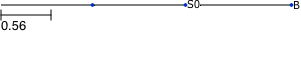

In [87]:
# Calculate A^B
A = 3
B = 5

alphabet = {}

tB = Tree()
prev = tB.add_child(name="B")
for i in range(B):
    prev = prev.add_child(name="1")
prev = prev.add_child(name="eB")

alphabet['B'] = tB
alphabet['eB'] = list2tree(['eB','1'])
alphabet['1'] = horzTree('1',A)


#Transitions
transitions = {}
transitions['S0-B'] = 'S1'
transitions['S1'] = 'S2'
transitions['S2-B'] = 'S1'

transitions['S2-1'] = '2'
transitions['2'] = '3'
transitions['3-1'] = '2'

transitions['2-eB'] = 'D'
transitions['D-1'] = 'D'


root = Tree()
root.format = 100
a = root.add_child(name="S0")
b = a.add_child(name="B")



def my_layout(node):
        F = TextFace(node.name, tight_text=True)
        add_face_to_node(F, node, column=0, position="branch-right")

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout
root.render("%%inline",tree_style = ts) 

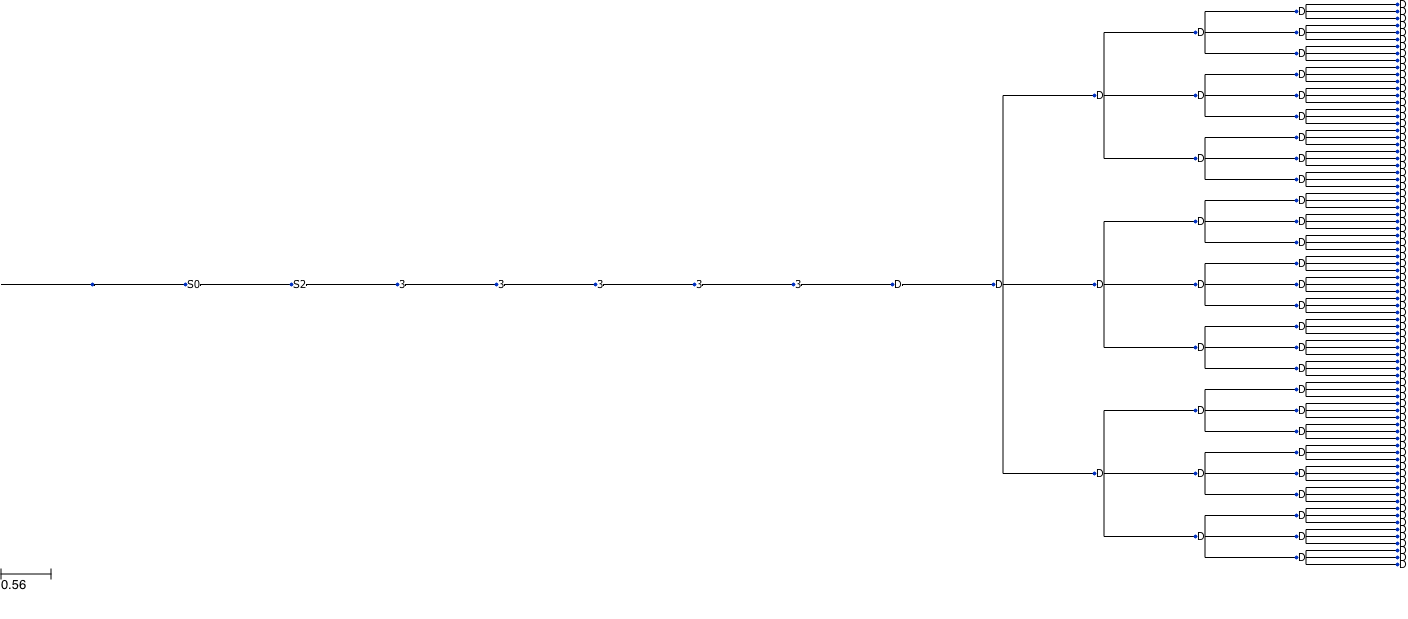

In [96]:
#Run
root = grow(root,alphabet)
transition(root,transitions)
root.render("%%inline",tree_style = ts) 

In [98]:
# Print Ans
my_dict = countLayers(root)
print('%d ^ %d = %d' %(A,B,my_dict[my_dict.keys()[-1]]))


3 ^ 5 = 81


# Cantor

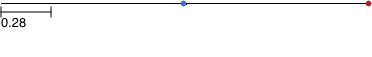

In [1004]:
# Cantor Set
alphabet['1'] = Tree('(1,0,1);')
alphabet['0'] = Tree('(0,0,0);')


root = Tree()
root.format = 100
a = root.add_child(name="1")

def my_layout(node):
    
    nstyle = NodeStyle()
    nstyle["size"] = 5
    if node.name == '1':
        nstyle["fgcolor"] = "FireBrick"
    else:
        nstyle["fgcolor"] = "RoyalBlue"
    node.set_style(nstyle)

ts = TreeStyle()
ts.show_leaf_name = False
ts.layout_fn = my_layout

root.render("%%inline",tree_style = ts) 


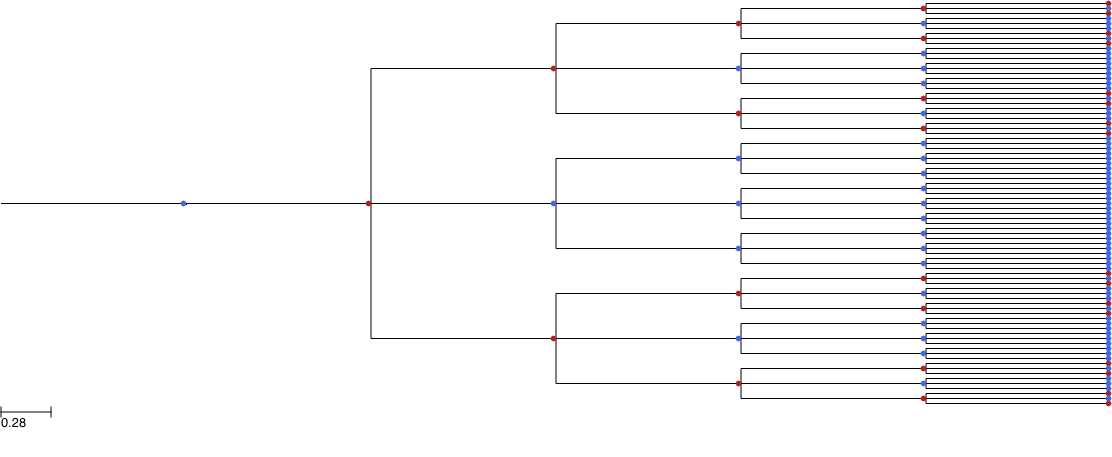

In [714]:
#t1 = Tree('(A,(A));')
root = grow(root,alphabet)

root.render("%%inline",tree_style = ts) 
#print(t)


In [716]:
print(countNodesPerLayer(root,'1'))
print(countLayers(root))

{1.0: 1, 2.0: 2, 3.0: 4, 4.0: 8, 5.0: 16}
{0.0: 1, 1.0: 1, 2.0: 3, 3.0: 9, 4.0: 27, 5.0: 81}
